In [71]:
#Import python liabraries from scikit-learn.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,recall_score,precision_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score


In [73]:
#Load dataset
df=pd.read_csv("spam.csv",encoding="latin1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [75]:
# Drop unnecessary columns
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

C:\Users\ujwal\AppData\Local\Temp\ipykernel_21764\821194643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['message_length'] = df['message'].apply(len)


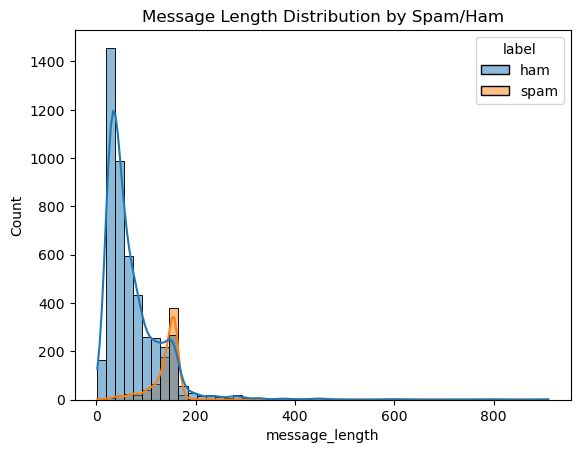

In [77]:
# Add message length column
df['message_length'] = df['message'].apply(len)

# Plot message length distribution by label (spam/ham)
sns.histplot(data=df, x='message_length', hue='label', bins=50, kde=True)
plt.title("Message Length Distribution by Spam/Ham")
plt.show()


In [79]:

# Convert labels to binary (ham = 0, spam = 1)
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

C:\Users\ujwal\AppData\Local\Temp\ipykernel_21764\393753329.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})


In [81]:
# Display basic info
print(df.head())
print(df.info())
print(df['label'].value_counts())

  label                                            message  message_length  \
0   ham  Go until jurong point, crazy.. Available only ...             111   
1   ham                      Ok lar... Joking wif u oni...              29   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3   ham  U dun say so early hor... U c already then say...              49   
4   ham  Nah I don't think he goes to usf, he lives aro...              61   

   label_num  
0          0  
1          0  
2          1  
3          0  
4          0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   label           5572 non-null   object
 1   message         5572 non-null   object
 2   message_length  5572 non-null   int64 
 3   label_num       5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.3+ KB
None
label
ham     

In [83]:

# Text preprocessing
X = df['message']
y = df['label_num']

In [85]:
# Text vectorization
vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X)

In [87]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)


In [89]:
# Train the model
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [91]:
# Predict
y_pred = model.predict(X_test)

In [93]:
# Evaluation
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))



✅ Accuracy: 0.97847533632287

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.91      0.93      0.92       150

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115



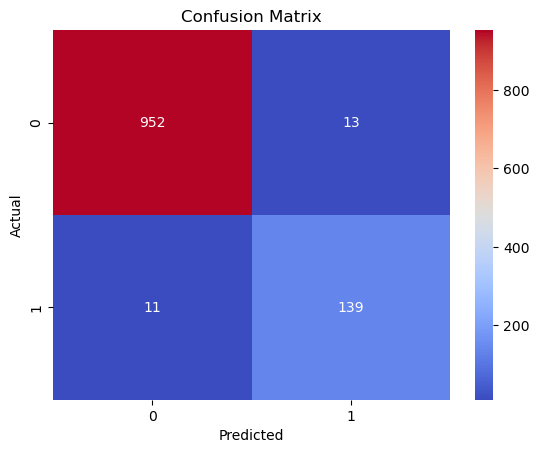

In [95]:
# Plot Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
